In [1]:
# House Price Prediction with Machine Learning:

%pip install pandas numpy matplotlib seaborn scikit-learn xgboost -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import fetch_california_housing
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Loading the dataset:
california_housing = fetch_california_housing()
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['target'] = california_housing.target

print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

Dataset shape: (20640, 9)

Column names:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'target']

First few rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Basic Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154

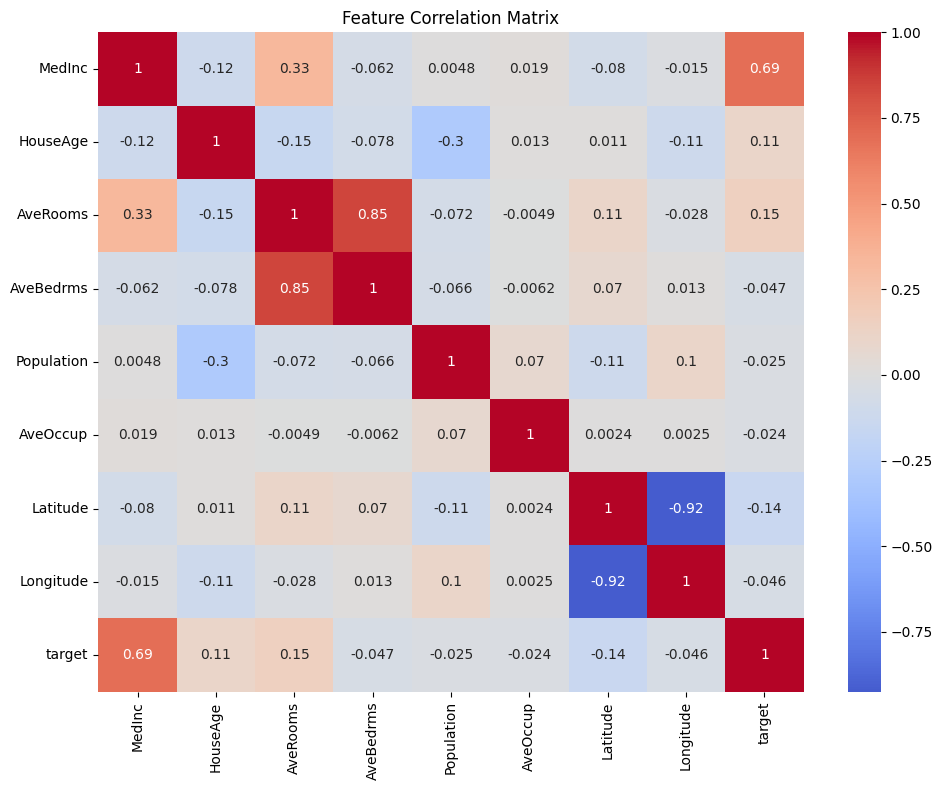

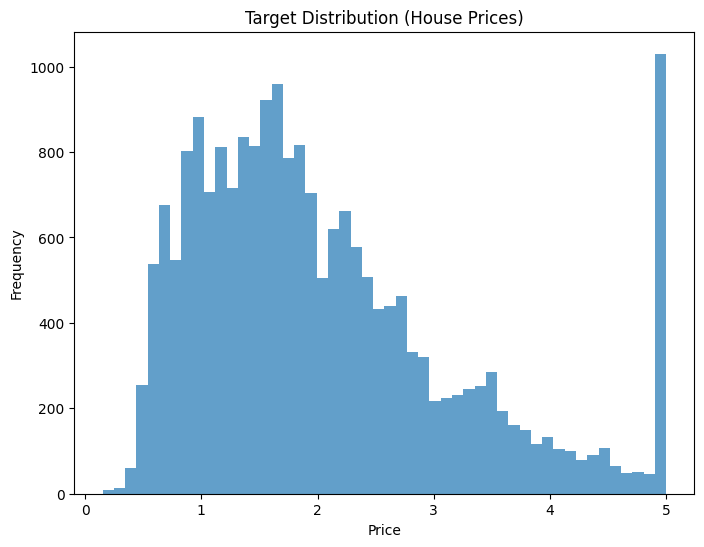

In [3]:
# Exploratory Data Analysis (EDA):

# Basic statistics:
print("Dataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

# Check for missing values:
print("\nMissing values:")
print(df.isnull().sum())

# Correlation matrix:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Target distribution:
plt.figure(figsize=(8, 6))
plt.hist(df['target'], bins=50, alpha=0.7)
plt.title('Target Distribution (House Prices)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [4]:
# Data Preprocessing:

df.fillna(df.mean(), inplace=True)

# For categorical features, use one-hot encoding:
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Prepare features and target:
X = df.drop('target', axis=1)
y = df['target']

# Split the data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)


Training set shape: (16512, 8)
Test set shape: (4128, 8)


In [5]:
# Model Training:

# Linear Regression:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)

# Random Forest Regression:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)

print("Models trained successfully!")


Models trained successfully!


In [6]:
# Model Evaluation:

def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{model_name} Performance:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

    return rmse, mae, r2

# Evaluate models:
lr_rmse, lr_mae, lr_r2 = evaluate_model(y_test, lr_predictions, "Linear Regression")
rf_rmse, rf_mae, rf_r2 = evaluate_model(y_test, rf_predictions, "Random Forest")

# Compare models:
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)
print(f"{'Model':<20} {'RMSE':<10} {'MAE':<10} {'R²':<10}")
print("-"*50)
print(f"{'Linear Regression':<20} {lr_rmse:<10.4f} {lr_mae:<10.4f} {lr_r2:<10.4f}")
print(f"{'Random Forest':<20} {rf_rmse:<10.4f} {rf_mae:<10.4f} {rf_r2:<10.4f}")

# Best model:
best_model = "Linear Regression" if lr_r2 > rf_r2 else "Random Forest"
print(f"\nBest Model: {best_model}")



Linear Regression Performance:
RMSE: 0.7456
MAE: 0.5332
R² Score: 0.5758

Random Forest Performance:
RMSE: 0.5051
MAE: 0.3274
R² Score: 0.8053

MODEL COMPARISON
Model                RMSE       MAE        R²        
--------------------------------------------------
Linear Regression    0.7456     0.5332     0.5758    
Random Forest        0.5051     0.3274     0.8053    

Best Model: Random Forest


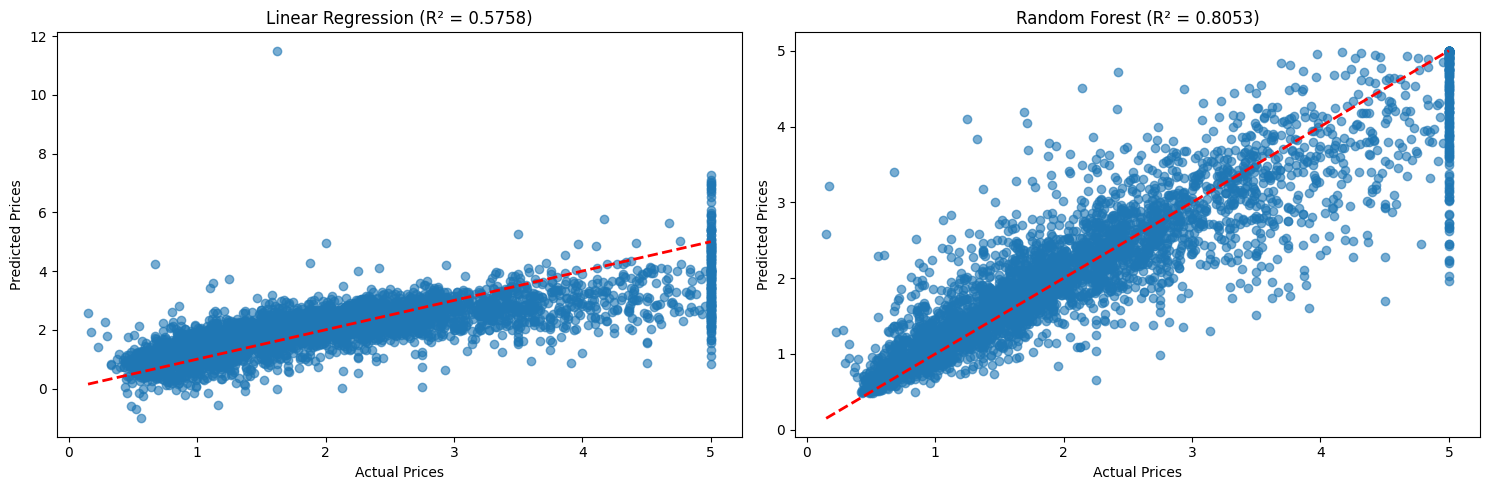


Sample Predictions:
Actual     LR Pred    RF Pred   
------------------------------
0.48       0.72       0.51      
0.46       1.76       0.74      
5.00       2.71       4.92      
2.19       2.84       2.53      
2.78       2.60       2.27      


In [7]:
# Visualization:

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Linear Regression predictions:
axes[0].scatter(y_test, lr_predictions, alpha=0.6)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Prices')
axes[0].set_ylabel('Predicted Prices')
axes[0].set_title(f'Linear Regression (R² = {lr_r2:.4f})')

# Random Forest predictions:
axes[1].scatter(y_test, rf_predictions, alpha=0.6)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Prices')
axes[1].set_ylabel('Predicted Prices')
axes[1].set_title(f'Random Forest (R² = {rf_r2:.4f})')

plt.tight_layout()
plt.show()

# Sample predictions:
print("\nSample Predictions:")
print(f"{'Actual':<10} {'LR Pred':<10} {'RF Pred':<10}")
print("-"*30)
for i in range(5):
    print(f"{y_test.iloc[i]:<10.2f} {lr_predictions[i]:<10.2f} {rf_predictions[i]:<10.2f}")
